In [2]:
!pip install opendatasets
!pip install pandas

In [3]:
import opendatasets as od
import pandas
 
od.download(
    "https://www.kaggle.com/datasets/mohamedberrimi/oct-images-balanced-version")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ammar777
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 4.15G/4.15G [10:11<00:00, 7.29MB/s]


In [4]:
import tensorflow as tf
import numpy as np
from keras.applications import imagenet_utils
from tensorflow.keras import layers
from tensorflow import keras

import tensorflow_datasets as tfds
# import tensorflow_addons as tfa

tfds.disable_progress_bar()

c:\users\gpusw1\appdata\local\programs\python\python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/GPUSW1/Desktop/oct-images-balanced-version/OCT_Balanced_Version/Balanced',
    shuffle = True,
    image_size = (256, 256),
    batch_size = 32,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/GPUSW1/Desktop/oct-images-balanced-version/test/test',
    shuffle = False,
    image_size = (256, 256),
    batch_size = 32,
)

Found 32064 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [7]:
def data_partition(data, train_split = 0.9, val_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds = len(data)
    if shuffle:
        data = data.shuffle(shuffle_size, seed = 23)

    train_size = int(train_split * ds)
    val_size = int(val_split * ds)

    train_data = data.take(train_size)
    val_data = data.skip(train_size)

    return train_data, val_data

In [8]:
train_data, val_data = data_partition(dataset)
print(f"{len(train_data)},{len(val_data)}")

901,101


In [15]:
from tensorflow import keras
model = keras.models.load_model('mobile-vit-xxs')

In [16]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_84 (Conv2D)             (None, 128, 128, 16  448         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                            

In [17]:
learning_rate = 0.0003
label_smoothing_factor = 0.1
epochs = 15

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
checkpoint_filepath = "/content/sample_data/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

In [18]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

In [20]:
model_1 = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    verbose = 1)

Epoch 1/15
901/901 [==============================] - 274s 256ms/step - loss: 0.5394 - accuracy: 0.7889 - val_loss: 0.3189 - val_accuracy: 0.8837
Epoch 2/15
901/901 [==============================] - 238s 247ms/step - loss: 0.2934 - accuracy: 0.8926 - val_loss: 0.4035 - val_accuracy: 0.8484
Epoch 3/15
901/901 [==============================] - 236s 245ms/step - loss: 0.2250 - accuracy: 0.9218 - val_loss: 0.2116 - val_accuracy: 0.9230
Epoch 4/15
901/901 [==============================] - 235s 244ms/step - loss: 0.1859 - accuracy: 0.9353 - val_loss: 0.1509 - val_accuracy: 0.9483
Epoch 5/15
901/901 [==============================] - 234s 242ms/step - loss: 0.1629 - accuracy: 0.9432 - val_loss: 0.1299 - val_accuracy: 0.9542
Epoch 6/15
901/901 [==============================] - 234s 243ms/step - loss: 0.1392 - accuracy: 0.9511 - val_loss: 0.1469 - val_accuracy: 0.9446
Epoch 7/15
901/901 [==============================] - 237s 246ms/step - loss: 0.1207 - accuracy: 0.9577 - val_loss: 0.1157 -

In [21]:
loss, accuracy = model.evaluate(test_dataset)

31/31 [==============================] - 3s 90ms/step - loss: 0.1362 - accuracy: 0.9721


In [22]:
model.save('oct_classify.h5')

In [23]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

In [24]:
accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
loss = model_1.history['loss']
val_loss = model_1.history['val_loss']

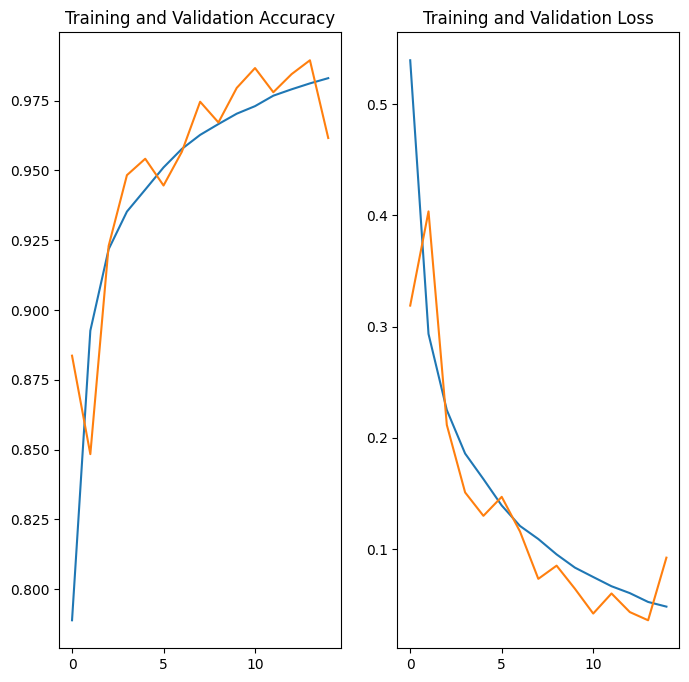

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
EPOCHS = 15
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.show()

['CNV', 'DME', 'DRUSEN', 'NORMAL']
1/1 [==============================] - 0s 63ms/step


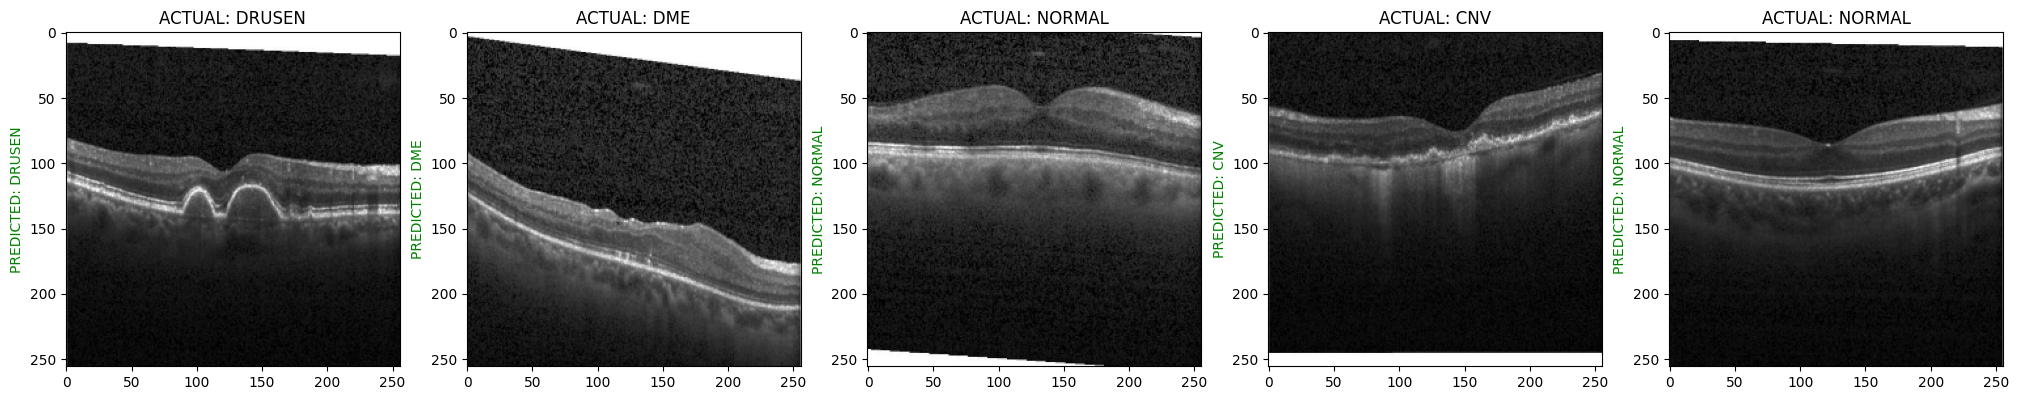

In [36]:
plt.figure(figsize = (25, 25))
CLASSES = dataset.class_names
print(CLASSES)
import numpy as np
for images, labels in train_data.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
    
        plt.imshow(images[i].numpy().astype('uint8'))
        pred = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(pred[0])
        if(CLASSES[labels[i]] == CLASSES[np.argmax(score)]):
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'green'})
        else:
            plt.title('ACTUAL: ' + CLASSES[labels[i]])
            plt.ylabel('PREDICTED: ' + CLASSES[np.argmax(score)], fontdict = {'color':'red'})

31/31 [==============================] - 4s 79ms/step


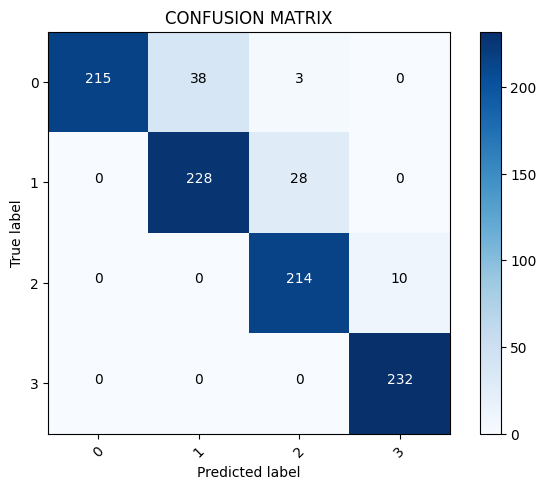

In [37]:
from sklearn.metrics import confusion_matrix
import itertools

#making a confusion matrixes
def plot_cm(cm, classes, normalize = False, title = 'CONFUSION MATRIX', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(test_dataset)

y_pred_class = np.argmax(y_pred, axis = 1)

y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(label[i].numpy())

# y_true = np.argmax(dataset)
# print(y_true)

confusion_mtx = confusion_matrix(y_val, y_pred_class) 

plot_cm(confusion_mtx, classes = range(4))

In [40]:
from sklearn.metrics import f1_score
y_pred = model.predict(test_dataset)

y_pred_class = np.argmax(y_pred, axis = 1)
y_val = []
for _, label in test_dataset:
    for i in label:
        y_val.append(label[i].numpy())
    
    
f1_score(y_val, y_pred_class, average = 'macro')    
f1_score(y_val, y_pred_class, average = None)    

31/31 [==============================] - 3s 77ms/step


array([0.91295117, 0.87356322, 0.91257996, 0.97890295])